In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import display

In [10]:
left = -1
right = 1
k = 1
n = 13

In [11]:
def phi(x, i):
    return x**i * (1 - x ** 2)

def a(x):
    return math.sin(k)

def b(x):
    return math.cos(k)

def f(x):
    return -1

def p(x):
    return 1 + x * x * b(x)

In [18]:
def GetBasisCoefficient(j, x):
    if j == 0:
        return -2 + (1 - x ** 2) * p(x)
    elif j == 1:
        return -6 * x + (x - x ** 3) * p(x)
    else:
        return j * (j - 1) * x ** (j - 2) - (j + 1) * (j + 2) * x ** j \
                     + (x ** j - x ** (j + 2)) * p(x)
    
def AddSolutionToPlot(X, A, y):
    res = np.linalg.solve(A, y)
    func = lambda x: sum(res[i] * phi(x, i) for i in range(n))
    Y = [func(x) for x in X]
    plt.grid()
    plt.plot(X, Y)

# Метод коллокаций

In [19]:
def func_1():
    X = np.linspace(left, right, n)
    y = [f(x) for x in X]
    A = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            A[i][j] = GetBasisCoefficient(j, X[i])
    AddSolutionToPlot(X, A, y)

# Метод Найменьших квадратов (МНК)

## Интегральный МНК

In [20]:
def func_2_1():
    X = np.linspace(left, right, n)
    h = (right - left) / n
    A = [[0] * n for _ in range(n)]
    y = [0 for _ in range(n)]
    for i in range(n):
        y[i] = np.sum(f(X) * GetBasisCoefficient(i, X)) * h
        for j in range(n):
            A[i][j] = np.sum(GetBasisCoefficient(j, X) * GetBasisCoefficient(i, X)) * h
    AddSolutionToPlot(X, A, y)

## Дискретный МНК

In [21]:
def func_2_2():
    X = np.linspace(left, right, n)
    A = [[0] * n for _ in range(n)]
    y = [0 for _ in range(n)]
    for i in range(n):
        y[i] = np.sum([f(X) * GetBasisCoefficient(i, X)])
        for j in range(n):
            A[i][j] = np.sum(GetBasisCoefficient(j, X) * GetBasisCoefficient(i, X))
    AddSolutionToPlot(X, A, y)

# Метод Галеркина

In [22]:
def func_3():
    X = np.linspace(left, right, n)
    A = [[0] * n for _ in range(n)]
    h = (right - left) / n
    y = [0 for _ in range(n)]
    for i in range(n):
        y[i] = np.sum(f(X) * phi(X, i)) * h
        for j in range(n):
            A[i][j] = np.sum(phi(X, i) * GetBasisCoefficient(j, X)) * h
    AddSolutionToPlot(X, A, y)

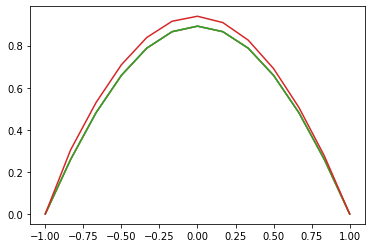

In [23]:
func_1()
func_2_1()
func_2_2()
func_3()